<span style="color: #445E80; font-weight: bold;">Let us extract both datasets and their info.</span>

In [1]:
import pandas as pd
import re

base_df = pd.read_csv("Steamspy_50k.csv")
hltb_df = pd.read_csv("hltb_FINAL_results.csv")

In [2]:
base_df.head(5)

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,owners_mid
0,730,Counter-Strike: Global Offensive,Valve,Valve,NaN,7642084,1173003,0,"100,000,000 .. 200,000,000",33019,768,6720,320,0.0,0.0,0.0,1013936,150000000.0
1,1172470,Apex Legends,Respawn,Electronic Arts,NaN,668053,326926,0,"100,000,000 .. 200,000,000",10149,620,949,207,0.0,0.0,0.0,124262,150000000.0
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",NaN,1520457,1037487,0,"100,000,000 .. 200,000,000",23380,700,5811,250,0.0,0.0,0.0,314682,150000000.0
3,1623730,Palworld,Pocketpair,Pocketpair,NaN,358266,22443,0,"50,000,000 .. 100,000,000",3737,992,2199,398,2999.0,2999.0,0.0,18028,75000000.0
4,440,Team Fortress 2,Valve,Valve,NaN,1044264,117208,0,"50,000,000 .. 100,000,000",21996,411,4404,105,0.0,0.0,0.0,43819,75000000.0


In [3]:
hltb_df.head(5)

,search_key,matched_name,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
0,palworld,Palworld,39.83,74.06,89.24,70.21,100.70,0.00
1,pubg battlegrounds,PUBG: Battlegrounds,100.43,276.66,522.79,231.00,249.13,174.69
2,apex legends,Apex Legends,33.30,85.11,145.86,105.42,436.95,186.41
3,black myth wukong,Black Myth: Wukong,38.03,47.98,67.30,50.28,0.00,0.00
4,team fortress,Team Fortress 2,293.02,587.12,2616.46,591.61,199.31,560.64


In [4]:
print("--- Base (Steamspy) DataFrame Info ---")
base_df.info()


--- Base (Steamspy) DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            50000 non-null  int64  
 1   name             49986 non-null  object 
 2   developer        49824 non-null  object 
 3   publisher        49655 non-null  object 
 4   score_rank       27 non-null     float64
 5   positive         50000 non-null  int64  
 6   negative         50000 non-null  int64  
 7   userscore        50000 non-null  int64  
 8   owners           50000 non-null  object 
 9   average_forever  50000 non-null  int64  
 10  average_2weeks   50000 non-null  int64  
 11  median_forever   50000 non-null  int64  
 12  median_2weeks    50000 non-null  int64  
 13  price            49996 non-null  float64
 14  initialprice     49996 non-null  float64
 15  discount         49996 non-null  float64
 16  ccu              50

In [5]:
print("\n--- HLTB DataFrame Info ---")
hltb_df.info()


--- HLTB DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43320 entries, 0 to 43319
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   search_key         43319 non-null  object 
 1   matched_name       43320 non-null  object 
 2   Main Story (h)     43320 non-null  float64
 3   Main + Sides (h)   43320 non-null  float64
 4   Completionist (h)  43320 non-null  float64
 5   All Styles (h)     43320 non-null  float64
 6   Co-Op (h)          43320 non-null  float64
 7   Vs (h)             43320 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.6+ MB


In [6]:
print("--- Base (Steamspy) Null Value Counts ---")
print(base_df.isnull().sum())

--- Base (Steamspy) Null Value Counts ---
appid                  0
name                  14
developer            176
publisher            345
score_rank         49973
positive               0
negative               0
userscore              0
owners                 0
average_forever        0
average_2weeks         0
median_forever         0
median_2weeks          0
price                  4
initialprice           4
discount               4
ccu                    0
owners_mid             0
dtype: int64


In [7]:
print("\n--- HLTB Null Value Counts ---")
print(hltb_df.isnull().sum())


--- HLTB Null Value Counts ---
search_key           1
matched_name         0
Main Story (h)       0
Main + Sides (h)     0
Completionist (h)    0
All Styles (h)       0
Co-Op (h)            0
Vs (h)               0
dtype: int64


<span style="color: #445E80; font-weight: bold;">Let us now do some prelimenary cleaning. Let us drop the entries with NULL names so we can join the two datasets.</span>

In [8]:
base_df.dropna(subset=['name'], inplace=True)

<span style="color: #445E80; font-weight: bold;">Lets also standardize their names.</span>

In [9]:
def clean_name_safe(name):
    name_str = str(name).lower()
    name_str = name_str.replace('&', 'and')
    name_str = name_str.replace('™', '')
    name_str = name_str.replace('®', '')
    name_str = name_str.replace(' ix', ' 9')
    name_str = name_str.replace(' iv', ' 4')
    name_str = name_str.replace(' v', ' 5')
    name_str = name_str.replace(' vi', ' 6')
    name_str = name_str.replace(' vii', ' 7')
    name_str = name_str.replace(' viii', ' 8')
    name_str = name_str.replace(' x', ' 10')
    name_str = name_str.replace(' i', ' 1')
    name_str = re.sub(r'[^a-z0-9\s]', '', name_str)
    name_str = re.sub(r'\s+', ' ', name_str)
    return name_str.strip()

print("Applying 'clean_name_safe' to SteamSpy data...")

base_df['join_key'] = base_df['name'].apply(clean_name_safe)

Applying 'clean_name_safe' to SteamSpy data...


In [10]:
print("\n--- Base (Steamspy) Cleaned Names ---")
base_df[['name', 'join_key']]


--- Base (Steamspy) Cleaned Names ---


,name,join_key
0,Counter-Strike: Global Offensive,counterstrike global offensive
1,Apex Legends,apex legends
2,PUBG: BATTLEGROUNDS,pubg battlegrounds
3,Palworld,palworld
4,Team Fortress 2,team fortress 2
...,...,...
49995,Forever Alone,forever alone
49996,Catacombs: The Asper Case,catacombs the asper case
49997,Nightmare Survival,nightmare survival
49998,Ninja Express,ninja express


In [11]:
print("\n--- HLTB Cleaned Names ---")
hltb_df[['matched_name', 'search_key']]


--- HLTB Cleaned Names ---


,matched_name,search_key
0,Palworld,palworld
1,PUBG: Battlegrounds,pubg battlegrounds
2,Apex Legends,apex legends
3,Black Myth: Wukong,black myth wukong
4,Team Fortress 2,team fortress
...,...,...
43315,N/A - No Match,dinodrifters
43316,N/A - No Match,cymut 0 mutrobo rpg
43317,N/A - No Match,catacombs the asper case
43318,N/A - No Match,ninja express


<span style="color: #445E80; font-weight: bold;">Remove noise</span>

In [12]:
noise_keywords = ['Soundtrack', 'DLC', 'Artbook', 'Demo', 'Beta', 'Prologue', 'Season Pass']
is_noise = base_df['name'].str.contains('|'.join(noise_keywords), case=False, na=False)

print(f"Original SteamSpy rows: {len(base_df)}")
base_df = base_df[~is_noise] 
print(f"Filtered SteamSpy rows (removed noise): {len(base_df)}")

Original SteamSpy rows: 49986
Filtered SteamSpy rows (removed noise): 49567


<span style="color: #445E80; font-weight: bold;">Now let us merge</span>

In [13]:
print("Merging dataframes...")
merged_df = pd.merge(
    base_df, 
    hltb_df, 
    left_on='join_key',    
    right_on='search_key', 
    how='left'
)

print(f"Merge complete. Total rows: {len(merged_df)}")

Merging dataframes...
Merge complete. Total rows: 49595


In [14]:
merged_df.head(5)

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,...,owners_mid,join_key,search_key,matched_name,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
0,730,Counter-Strike: Global Offensive,Valve,Valve,NaN,7642084,1173003,0,"100,000,000 .. 200,000,000",33019,...,150000000.0,counterstrike global offensive,counterstrike global offensive,Counter-Strike 2,121.25,365.22,770.33,414.30,305.67,723.15
1,1172470,Apex Legends,Respawn,Electronic Arts,NaN,668053,326926,0,"100,000,000 .. 200,000,000",10149,...,150000000.0,apex legends,apex legends,Apex Legends,33.30,85.11,145.86,105.42,436.95,186.41
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",NaN,1520457,1037487,0,"100,000,000 .. 200,000,000",23380,...,150000000.0,pubg battlegrounds,pubg battlegrounds,PUBG: Battlegrounds,100.43,276.66,522.79,231.00,249.13,174.69
3,1623730,Palworld,Pocketpair,Pocketpair,NaN,358266,22443,0,"50,000,000 .. 100,000,000",3737,...,75000000.0,palworld,palworld,Palworld,39.83,74.06,89.24,70.21,100.70,0.00
4,440,Team Fortress 2,Valve,Valve,NaN,1044264,117208,0,"50,000,000 .. 100,000,000",21996,...,75000000.0,team fortress 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cols_to_drop = [
    'join_key', 
    'search_key', 
    'matched_name', 
    'score_rank',
    'positive',
    'negative', 
    'userscore',
    'appid'
]
merged_df.drop(columns=cols_to_drop, axis=1, inplace=True, errors='ignore')

In [16]:
merged_df.head(5)

,name,developer,publisher,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
0,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000",33019,768,6720,320,0.0,0.0,0.0,1013936,150000000.0,121.25,365.22,770.33,414.30,305.67,723.15
1,Apex Legends,Respawn,Electronic Arts,"100,000,000 .. 200,000,000",10149,620,949,207,0.0,0.0,0.0,124262,150000000.0,33.30,85.11,145.86,105.42,436.95,186.41
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.","100,000,000 .. 200,000,000",23380,700,5811,250,0.0,0.0,0.0,314682,150000000.0,100.43,276.66,522.79,231.00,249.13,174.69
3,Palworld,Pocketpair,Pocketpair,"50,000,000 .. 100,000,000",3737,992,2199,398,2999.0,2999.0,0.0,18028,75000000.0,39.83,74.06,89.24,70.21,100.70,0.00
4,Team Fortress 2,Valve,Valve,"50,000,000 .. 100,000,000",21996,411,4404,105,0.0,0.0,0.0,43819,75000000.0,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color: #445E80; font-weight: bold;">Now let us drop the rows that did not merge properly for whatever reason</span>

In [17]:
hltb_specific_columns = ['Main Story (h)', 'Main + Sides (h)', 'Completionist (h)', 'Co-Op (h)', 'Vs (h)']
unmatched_mask = merged_df[hltb_specific_columns].isnull().all(axis=1)
unmatched_count = unmatched_mask.sum()

print(f"Total rows in merged_df: {len(merged_df)}")
print(f"Number of rows with no HLTB match (to be removed): {unmatched_count}")

Total rows in merged_df: 49595
Number of rows with no HLTB match (to be removed): 10185


In [18]:
hltb_specific_columns = [
    'Main Story (h)', 'Main + Sides (h)', 'Completionist (h)', 
    'Co-Op (h)', 'Vs (h)'
]

unmatched_mask = merged_df[hltb_specific_columns].isnull().all(axis=1)
unmatched_count = unmatched_mask.sum()
total_rows = len(merged_df)
matched_count = total_rows - unmatched_count

print(f"\n--- Merge Analysis Complete ---")
print(f"Total rows: {total_rows}")
print(f"Successfully Matched rows: {matched_count}")
print(f"Unmatched rows (no HLTB data): {unmatched_count}")


--- Merge Analysis Complete ---
Total rows: 49595
Successfully Matched rows: 39410
Unmatched rows (no HLTB data): 10185


In [19]:
cleaned_df = merged_df.dropna(subset=hltb_specific_columns, how='all')
print(f"Original merged rows: {len(merged_df)}")
print(f"New 'cleaned' rows: {len(cleaned_df)}")

Original merged rows: 49595
New 'cleaned' rows: 39410


In [20]:
merged_df = cleaned_df
df = merged_df
df.head(5)

,name,developer,publisher,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
0,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000",33019,768,6720,320,0.0,0.0,0.0,1013936,150000000.0,121.25,365.22,770.33,414.30,305.67,723.15
1,Apex Legends,Respawn,Electronic Arts,"100,000,000 .. 200,000,000",10149,620,949,207,0.0,0.0,0.0,124262,150000000.0,33.30,85.11,145.86,105.42,436.95,186.41
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.","100,000,000 .. 200,000,000",23380,700,5811,250,0.0,0.0,0.0,314682,150000000.0,100.43,276.66,522.79,231.00,249.13,174.69
3,Palworld,Pocketpair,Pocketpair,"50,000,000 .. 100,000,000",3737,992,2199,398,2999.0,2999.0,0.0,18028,75000000.0,39.83,74.06,89.24,70.21,100.70,0.00
6,New World: Aeternum,Amazon Games,Amazon Games,"50,000,000 .. 100,000,000",10672,1219,3685,598,5999.0,5999.0,0.0,5583,75000000.0,28.67,106.50,0.00,46.60,0.00,0.00


<span style="color: #445E80; font-weight: bold;"> Now let us clean up the vs column and fill it so that we can use it to split.</span>

In [21]:
df['Vs (h)'] = df['Vs (h)'].fillna(0)

<span style="color: #445E80; font-weight: bold;">And remove the remaining useless columns </span>

In [22]:
df.drop(['price','initialprice','discount', 'average_2weeks', 'median_2weeks','ccu'],axis=1,inplace=True,errors='ignore')
df.head(5)

,name,developer,publisher,owners,average_forever,median_forever,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
0,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000",33019,6720,150000000.0,121.25,365.22,770.33,414.30,305.67,723.15
1,Apex Legends,Respawn,Electronic Arts,"100,000,000 .. 200,000,000",10149,949,150000000.0,33.30,85.11,145.86,105.42,436.95,186.41
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.","100,000,000 .. 200,000,000",23380,5811,150000000.0,100.43,276.66,522.79,231.00,249.13,174.69
3,Palworld,Pocketpair,Pocketpair,"50,000,000 .. 100,000,000",3737,2199,75000000.0,39.83,74.06,89.24,70.21,100.70,0.00
6,New World: Aeternum,Amazon Games,Amazon Games,"50,000,000 .. 100,000,000",10672,3685,75000000.0,28.67,106.50,0.00,46.60,0.00,0.00


<span style="color: #445E80; font-weight: bold;">Let us also convert the avergae playtime to hours to standardize everything</span>

In [23]:
cols_to_convert = ['average_forever', 'median_forever']

def to_hours(x):
    return float(x/60)

df[cols_to_convert] = df[cols_to_convert].applymap(to_hours)
df.head(5)

C:\Users\abdul\AppData\Local\Temp\ipykernel_7220\1846098136.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols_to_convert] = df[cols_to_convert].applymap(to_hours)


,name,developer,publisher,owners,average_forever,median_forever,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
0,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000",550.316667,112.000000,150000000.0,121.25,365.22,770.33,414.30,305.67,723.15
1,Apex Legends,Respawn,Electronic Arts,"100,000,000 .. 200,000,000",169.150000,15.816667,150000000.0,33.30,85.11,145.86,105.42,436.95,186.41
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.","100,000,000 .. 200,000,000",389.666667,96.850000,150000000.0,100.43,276.66,522.79,231.00,249.13,174.69
3,Palworld,Pocketpair,Pocketpair,"50,000,000 .. 100,000,000",62.283333,36.650000,75000000.0,39.83,74.06,89.24,70.21,100.70,0.00
6,New World: Aeternum,Amazon Games,Amazon Games,"50,000,000 .. 100,000,000",177.866667,61.416667,75000000.0,28.67,106.50,0.00,46.60,0.00,0.00


In [24]:
df.shape

(39410, 13)

In [25]:
df.head(4)

,name,developer,publisher,owners,average_forever,median_forever,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
0,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000",550.316667,112.000000,150000000.0,121.25,365.22,770.33,414.30,305.67,723.15
1,Apex Legends,Respawn,Electronic Arts,"100,000,000 .. 200,000,000",169.150000,15.816667,150000000.0,33.30,85.11,145.86,105.42,436.95,186.41
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.","100,000,000 .. 200,000,000",389.666667,96.850000,150000000.0,100.43,276.66,522.79,231.00,249.13,174.69
3,Palworld,Pocketpair,Pocketpair,"50,000,000 .. 100,000,000",62.283333,36.650000,75000000.0,39.83,74.06,89.24,70.21,100.70,0.00


In [26]:
df.sort_values(by='average_forever',ascending=False).head(10)

,name,developer,publisher,owners,average_forever,median_forever,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
27297,iTownGamePlay UNIVERSE,Undermax Games,Undermax Games,"0 .. 20,000",28873.966667,28873.966667,10000.0,0.00,0.00,0.00,0.00,0.0,0.0
6950,Terminal Hacker,NaN,Achpile,"100,000 .. 200,000",13877.516667,15947.266667,150000.0,0.00,0.20,1.02,0.96,0.0,0.0
7558,The Secret of Tremendous Corporation,"Sebastian Krzyszkowiak, Konrad Burandt, Paweł ...",dosowisko.net,"100,000 .. 200,000",3160.366667,6319.200000,150000.0,0.72,0.78,0.80,0.78,0.0,0.0
12780,The Abbey of Crime Extensum,"Manuel Pazos, Daniel Celemín","Manuel Pazos, Daniel Celemín","50,000 .. 100,000",3155.883333,4733.616667,75000.0,4.72,0.00,4.95,4.87,0.0,0.0
48996,Xploquest,Jean-Sébastien Nouveau,33 Production,"0 .. 20,000",2759.983333,2759.983333,10000.0,0.00,0.00,0.00,0.00,0.0,0.0
1451,YoloMouse - Game Cursor Changer,Dragonrise Games,Dragonrise Games,"500,000 .. 1,000,000",2251.366667,1967.416667,750000.0,0.00,0.00,0.00,0.00,0.0,0.0
16262,Veritas,Glitch Games,Glitch Games,"20,000 .. 50,000",1807.383333,1807.383333,35000.0,4.00,6.33,0.00,5.17,0.0,0.0
13020,Making History: The Calm and the Storm Gold Ed...,Muzzy Lane Software,Factus Games,"50,000 .. 100,000",1544.016667,1544.016667,75000.0,0.00,53.00,0.00,53.00,0.0,0.0
14333,The Moment We Met,萌约游戏制作组,萌约游戏制作组,"50,000 .. 100,000",1362.633333,0.616667,75000.0,0.00,0.00,0.00,0.00,0.0,0.0
9130,sheepChat,sheepChat Team,sheepChat Team,"100,000 .. 200,000",1336.483333,1336.483333,150000.0,0.00,0.00,0.00,0.00,0.0,0.0


<span style="color: #445E80; font-weight: bold;">Let us also remove shovelware/games with owners too low to not mess up our analysis</span>

In [27]:
OWNER_THRESHOLD = 35000
AVERAGE_PLAYTIME_THRESHOLD = 2
MEDIAN_PLAYTIME_THRESHOLD = 1

print(f"Rows before filtering: {len(df)}")
df = df[df['owners_mid'] > OWNER_THRESHOLD]
df = df[df['median_forever'] >= MEDIAN_PLAYTIME_THRESHOLD]
df = df[df['average_forever'] >= AVERAGE_PLAYTIME_THRESHOLD]
print(f"Rows after filtering:  {len(df)}")

Rows before filtering: 39410
Rows after filtering:  7222


<span style="color: #445E80; font-weight: bold;">Among Us </span>

In [28]:
df[df['name'] == 'Among Us']

,name,developer,publisher,owners,average_forever,median_forever,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
42,Among Us,Innersloth,Innersloth,"20,000,000 .. 50,000,000",25.6,11.383333,35000000.0,8.22,15.86,27.74,13.87,19.04,18.69


-------------------------------------------------------------------------------------------------------------------------------------------

<span style="color: pink; font-weight: bold;">

Hypothesis testing: top 75% of median playtime players will play full game + sides

Hypothesis testing: co-op games have higher average campaign beaten than non-co-op

</span>

t_statistic, p_value = stats.ttest_ind(
    coop_games, 
    no_coop_games,
    alternative='greater',  # One-tailed: co-op > no co-op
    equal_var=False  # Welch's t-test (doesn't assume equal variance)
)

<span style="color: red; font-weight: bold;">Analysis Section </span>

In [29]:
df.head(2)

,name,developer,publisher,owners,average_forever,median_forever,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
0,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000",550.316667,112.000000,150000000.0,121.25,365.22,770.33,414.30,305.67,723.15
1,Apex Legends,Respawn,Electronic Arts,"100,000,000 .. 200,000,000",169.150000,15.816667,150000000.0,33.30,85.11,145.86,105.42,436.95,186.41


<span style="color: #445E80; font-weight: bold;">Let us do a simple, blunt analysis. We will use the average lifetime hours divided by the mid of the owners to get the top played games </span>

In [30]:
df.sort_values(by='average_forever', ascending=False).head(10)

,name,developer,publisher,owners,average_forever,median_forever,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h)
6950,Terminal Hacker,NaN,Achpile,"100,000 .. 200,000",13877.516667,15947.266667,150000.0,0.00,0.20,1.02,0.96,0.0,0.0
7558,The Secret of Tremendous Corporation,"Sebastian Krzyszkowiak, Konrad Burandt, Paweł ...",dosowisko.net,"100,000 .. 200,000",3160.366667,6319.200000,150000.0,0.72,0.78,0.80,0.78,0.0,0.0
12780,The Abbey of Crime Extensum,"Manuel Pazos, Daniel Celemín","Manuel Pazos, Daniel Celemín","50,000 .. 100,000",3155.883333,4733.616667,75000.0,4.72,0.00,4.95,4.87,0.0,0.0
1451,YoloMouse - Game Cursor Changer,Dragonrise Games,Dragonrise Games,"500,000 .. 1,000,000",2251.366667,1967.416667,750000.0,0.00,0.00,0.00,0.00,0.0,0.0
13020,Making History: The Calm and the Storm Gold Ed...,Muzzy Lane Software,Factus Games,"50,000 .. 100,000",1544.016667,1544.016667,75000.0,0.00,53.00,0.00,53.00,0.0,0.0
9130,sheepChat,sheepChat Team,sheepChat Team,"100,000 .. 200,000",1336.483333,1336.483333,150000.0,0.00,0.00,0.00,0.00,0.0,0.0
3058,XSOverlay,Xiexe,Xiexe,"200,000 .. 500,000",1273.966667,810.866667,350000.0,0.00,0.00,0.00,0.00,0.0,0.0
4284,The Banner Saga: Factions,Stoic,Versus Evil,"200,000 .. 500,000",1268.183333,2.550000,350000.0,15.00,0.00,0.00,15.00,0.0,3.0
9575,Multiverse Loot Hunter,游戏养家工作室,游戏养家工作室,"50,000 .. 100,000",905.216667,256.516667,75000.0,0.00,0.00,0.00,0.00,0.0,0.0
4703,Rogue Agent,Jorge Aires,Jigsaw Unravel,"200,000 .. 500,000",852.433333,607.850000,350000.0,0.28,0.00,0.00,0.28,0.0,0.0


<span style="color: #445E80; font-weight: bold;">And one with the MOST played games</span>

In [31]:
df['total_hours_played'] = df['average_forever']*df['owners_mid']
df.sort_values(by='total_hours_played',ascending=False)[['name','developer','publisher','total_hours_played','average_forever','median_forever']].head(10)

,name,developer,publisher,total_hours_played,average_forever,median_forever
0,Counter-Strike: Global Offensive,Valve,Valve,8.254750e+10,550.316667,112.000000
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",5.845000e+10,389.666667,96.850000
1,Apex Legends,Respawn,Electronic Arts,2.537250e+10,169.150000,15.816667
25,Rust,Facepunch Studios,Facepunch Studios,1.354442e+10,386.983333,51.950000
6,New World: Aeternum,Amazon Games,Amazon Games,1.334000e+10,177.866667,61.416667
10,Unturned,Smartly Dressed Games,Smartly Dressed Games,1.254875e+10,167.316667,6.000000
24,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,8.428000e+09,240.800000,39.366667
31,Path of Exile,Grinding Gear Games,Grinding Gear Games,7.352333e+09,210.066667,8.700000
38,Dead by Daylight,Behaviour Interactive Inc.,Behaviour Interactive Inc.,7.089833e+09,202.566667,23.433333
15,Warframe,Digital Extremes,Digital Extremes,6.969083e+09,199.116667,8.716667


<span style="color: #445E80; font-weight: bold;">We notice that in the first table, the mean and median were TOO similar. Not good. let us see what the norm is:</span>

In [32]:
valid_rows = df[
    (df['median_forever'] > 0) &  
    (df['average_forever'] != df['median_forever'])  
].copy()

valid_rows['playtime_ratio'] = valid_rows['average_forever'] / valid_rows['median_forever']

average_playtime_ratio = valid_rows['playtime_ratio'].mean()

print(f"Number of valid rows for ratio calculation: {len(valid_rows)}")
print(f"Average Mean/Median Playtime Ratio: {average_playtime_ratio}")

Number of valid rows for ratio calculation: 6918
Average Mean/Median Playtime Ratio: 2.6254617271549296


<span style="color: #445E80; font-weight: bold;"> Let us then define a metric for elimenating these entries </span>

In [33]:
print(f"Rows before reduction: {len(df)}")
ratio_is_sane = ((df['average_forever'] / df['median_forever']) > 1) & \
                  ((df['average_forever'] / df['median_forever']) < 15)
has_known_data = (df['Main Story (h)'] > 0.5) | (df['Vs (h)'] > 0.5)
df = df[ratio_is_sane & has_known_data].copy()
print(f"Rows after reduction: {len(df)}")

Rows before reduction: 7222
Rows after reduction: 3429


In [34]:
df.sort_values(by='average_forever', ascending=False)[['name','developer','publisher','median_forever','average_forever','owners_mid']].head(10)

,name,developer,publisher,median_forever,average_forever,owners_mid
0,Counter-Strike: Global Offensive,Valve,Valve,112.000000,550.316667,150000000.0
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",96.850000,389.666667,150000000.0
25,Rust,Facepunch Studios,Facepunch Studios,51.950000,386.983333,35000000.0
54,Rocket League,Psyonix LLC,Psyonix LLC,48.650000,335.666667,15000000.0
357,Cookie Clicker,"Orteil, DashNet",Playsaurus,89.000000,310.950000,3500000.0
194,RimWorld,Ludeon Studios,Ludeon Studios,68.900000,271.716667,7500000.0
95,DayZ,Bohemia Interactive,Bohemia Interactive,36.100000,248.350000,15000000.0
24,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,39.366667,240.800000,35000000.0
38,Dead by Daylight,Behaviour Interactive Inc.,Behaviour Interactive Inc.,23.433333,202.566667,35000000.0
159,Factorio,Wube Software LTD.,Wube Software LTD.,44.383333,201.616667,7500000.0


In [35]:
df.sort_values(by='median_forever', ascending=False)[['name','developer','publisher','median_forever','average_forever','owners_mid']].head(10)

,name,developer,publisher,median_forever,average_forever,owners_mid
0,Counter-Strike: Global Offensive,Valve,Valve,112.000000,550.316667,150000000.0
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",96.850000,389.666667,150000000.0
16,ELDEN RING,"FromSoftware, Inc.","FromSoftware, Inc., Bandai Namco Entertainment",93.750000,133.733333,35000000.0
357,Cookie Clicker,"Orteil, DashNet",Playsaurus,89.000000,310.950000,3500000.0
194,RimWorld,Ludeon Studios,Ludeon Studios,68.900000,271.716667,7500000.0
1924,SD GUNDAM G GENERATION CROSS RAYS,"TOM CREATE, 株式会社トムクリエイト","BANDAI NAMCO Entertainment, 株式会社バンダイナムコエンターテインメント",67.100000,82.850000,750000.0
6,New World: Aeternum,Amazon Games,Amazon Games,61.416667,177.866667,75000000.0
5235,The Hundred Line -Last Defense Academy-,"Too Kyo Games, Media.Vision Inc.",Aniplex Inc.,54.933333,64.550000,350000.0
13,Monster Hunter Wilds,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",54.766667,71.133333,35000000.0
25,Rust,Facepunch Studios,Facepunch Studios,51.950000,386.983333,35000000.0


<span style="color: #445E80; font-weight: bold;"> Much better! Now let us split these games by single and multiplayer. Let us define metrics for each and divide our dataframes into two seperate categories, while dropping rows who's time to beat is unknown.</span>

In [36]:
has_known_data = (df['Main Story (h)'] > 0) | (df['Vs (h)'] > 0)

df_filtered = df[has_known_data].copy()

is_single_player = df_filtered['Main Story (h)'] >= (2 * df_filtered['Vs (h)'])

single_player_df = df_filtered[is_single_player].copy()
multiplayer_df = df_filtered[~is_single_player].copy() 

print(f"Total games in original df: {len(df)}")
print(f"Games in single_player_df: {len(single_player_df)}")
print(f"Games in multiplayer_df: {len(multiplayer_df)}")


print("\nExporting datasets to CSV files...")

df_filtered.to_csv("all_filtered_games.csv", index=False)

single_player_df.to_csv("single_player_games.csv", index=False)

multiplayer_df.to_csv("multiplayer_games.csv", index=False)

print("Export complete: all_filtered_games.csv, single_player_games.csv, multiplayer_games.csv")

Total games in original df: 3429
Games in single_player_df: 3033
Games in multiplayer_df: 396

Exporting datasets to CSV files...
Export complete: all_filtered_games.csv, single_player_games.csv, multiplayer_games.csv


<span style="color: #445E80; font-weight: bold;"> Now let us repeat our averages and mids. </span>

In [37]:
single_player_df.sort_values(by='average_forever', ascending=False)[['name','developer','publisher','median_forever','average_forever','owners_mid']].head(10)

,name,developer,publisher,median_forever,average_forever,owners_mid
357,Cookie Clicker,"Orteil, DashNet",Playsaurus,89.000000,310.950000,3500000.0
194,RimWorld,Ludeon Studios,Ludeon Studios,68.900000,271.716667,7500000.0
159,Factorio,Wube Software LTD.,Wube Software LTD.,44.383333,201.616667,7500000.0
6,New World: Aeternum,Amazon Games,Amazon Games,61.416667,177.866667,75000000.0
3557,Stationeers,RocketWerkz,RocketWerkz,15.650000,176.266667,350000.0
1233,Dread Hunger,Dread Hunger Team,Digital Confectioners,44.050000,175.916667,1500000.0
422,ARK: Survival Ascended,"Studio Wildcard, Grove Street Games, Instinct ...","Studio Wildcard, Snail Games USA",35.133333,170.583333,3500000.0
4887,Ascension: Deckbuilding Game,"Playdek, Inc.","Playdek, Inc.",16.233333,160.016667,350000.0
1756,Avorion,Boxelware,Boxelware,42.400000,158.183333,750000.0
4478,Spirit City: Lofi Sessions,Mooncube Games,Mooncube Games,29.916667,151.500000,350000.0


In [38]:
single_player_df.sort_values(by='median_forever', ascending=False)[['name','developer','publisher','median_forever','average_forever','owners_mid','Co-Op (h)']].head(10)

,name,developer,publisher,median_forever,average_forever,owners_mid,Co-Op (h)
16,ELDEN RING,"FromSoftware, Inc.","FromSoftware, Inc., Bandai Namco Entertainment",93.750000,133.733333,35000000.0,51.03
357,Cookie Clicker,"Orteil, DashNet",Playsaurus,89.000000,310.950000,3500000.0,0.00
194,RimWorld,Ludeon Studios,Ludeon Studios,68.900000,271.716667,7500000.0,70.00
1924,SD GUNDAM G GENERATION CROSS RAYS,"TOM CREATE, 株式会社トムクリエイト","BANDAI NAMCO Entertainment, 株式会社バンダイナムコエンターテインメント",67.100000,82.850000,750000.0,0.00
6,New World: Aeternum,Amazon Games,Amazon Games,61.416667,177.866667,75000000.0,0.00
5235,The Hundred Line -Last Defense Academy-,"Too Kyo Games, Media.Vision Inc.",Aniplex Inc.,54.933333,64.550000,350000.0,0.00
13,Monster Hunter Wilds,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",54.766667,71.133333,35000000.0,47.70
35,Last Epoch,Eleventh Hour Games,Eleventh Hour Games,50.233333,92.483333,35000000.0,0.00
7,Black Myth: Wukong,Game Science,Game Science,46.700000,53.150000,75000000.0,0.00
6876,Sea Dogs: To Each His Own,BlackMark Studio,"Akella, Valkyrie Initiative",44.483333,96.266667,150000.0,0.00


In [39]:
multiplayer_df.sort_values(by='average_forever', ascending=False)[['name','developer','publisher','median_forever','average_forever','owners_mid']].head(10)

,name,developer,publisher,median_forever,average_forever,owners_mid
0,Counter-Strike: Global Offensive,Valve,Valve,112.000000,550.316667,150000000.0
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",96.850000,389.666667,150000000.0
25,Rust,Facepunch Studios,Facepunch Studios,51.950000,386.983333,35000000.0
54,Rocket League,Psyonix LLC,Psyonix LLC,48.650000,335.666667,15000000.0
95,DayZ,Bohemia Interactive,Bohemia Interactive,36.100000,248.350000,15000000.0
24,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,39.366667,240.800000,35000000.0
38,Dead by Daylight,Behaviour Interactive Inc.,Behaviour Interactive Inc.,23.433333,202.566667,35000000.0
27,ARK: Survival Evolved,"Studio Wildcard, Instinct Games, Efecto Studio...","Studio Wildcard, Snail Games USA",16.500000,195.166667,35000000.0
801,ATLAS,"Grapeshot Games, Instinct Games","Grapeshot Games, Snail Games USA",18.783333,181.300000,1500000.0
1,Apex Legends,Respawn,Electronic Arts,15.816667,169.150000,150000000.0


In [40]:
multiplayer_df.sort_values(by='median_forever', ascending=False).head(10)

,name,developer,publisher,owners,average_forever,median_forever,owners_mid,Main Story (h),Main + Sides (h),Completionist (h),All Styles (h),Co-Op (h),Vs (h),total_hours_played
0,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000",550.316667,112.000000,150000000.0,121.25,365.22,770.33,414.30,305.67,723.15,8.254750e+10
2,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.","100,000,000 .. 200,000,000",389.666667,96.850000,150000000.0,100.43,276.66,522.79,231.00,249.13,174.69,5.845000e+10
25,Rust,Facepunch Studios,Facepunch Studios,"20,000,000 .. 50,000,000",386.983333,51.950000,35000000.0,28.45,105.78,116.68,67.12,51.95,187.91,1.354442e+10
54,Rocket League,Psyonix LLC,Psyonix LLC,"10,000,000 .. 20,000,000",335.666667,48.650000,15000000.0,4.59,26.24,105.31,49.47,158.77,275.36,5.035000e+09
52,Monster Hunter: World,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.","10,000,000 .. 20,000,000",153.816667,48.066667,15000000.0,46.45,114.80,427.92,107.42,159.71,266.00,2.307250e+09
106,MONSTER HUNTER RISE,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.","5,000,000 .. 10,000,000",92.616667,42.033333,7500000.0,23.13,79.92,181.99,57.85,86.64,58.18,6.946250e+08
24,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,"20,000,000 .. 50,000,000",240.800000,39.366667,35000000.0,3.32,25.59,147.79,46.14,129.40,457.51,8.428000e+09
95,DayZ,Bohemia Interactive,Bohemia Interactive,"10,000,000 .. 20,000,000",248.350000,36.100000,15000000.0,50.77,91.58,133.78,61.93,94.39,98.47,3.725250e+09
10666,DEATH NOTE Killer Within,Grounding Inc.,Bandai Namco Entertainment Inc.,"50,000 .. 100,000",35.483333,35.016667,75000.0,1.30,0.00,0.00,1.30,0.00,0.93,2.661250e+06
17,Terraria,Re-Logic,Re-Logic,"20,000,000 .. 50,000,000",130.466667,33.450000,35000000.0,51.97,91.99,203.67,105.67,85.65,59.39,4.566333e+09


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<span style="color: red"> Part 3: Single Player Analysis </span>

<span style="color: #445E80; font-weight: bold;"> Let us do one final analysis for the single player games. Find the games by their proportion of playtime played. We will exlude games shorter than 3 hours to make this analysis more robust. </span>

In [41]:
single_player_df.head(2)
single_player_df = single_player_df[single_player_df['Main Story (h)'] > 4]

In [42]:
single_player_df['average_campaign_beaten'] = single_player_df['average_forever']/single_player_df['Main Story (h)']
single_player_df['median_campaign_beaten'] = single_player_df['median_forever']/single_player_df['Main Story (h)']
single_player_df.sort_values(by='average_campaign_beaten',ascending=False).head(10)[['name','developer','publisher','average_campaign_beaten','Main Story (h)','average_forever','average_campaign_beaten','median_campaign_beaten']]

,name,developer,publisher,average_campaign_beaten,Main Story (h),average_forever,average_campaign_beaten,median_campaign_beaten
4887,Ascension: Deckbuilding Game,"Playdek, Inc.","Playdek, Inc.",24.693930,6.48,160.016667,24.693930,2.505144
770,Shakes and Fidget,Playa Games GmbH,Playa Games GmbH,18.375000,7.60,139.650000,18.375000,1.625000
171,People Playground,mestiez,Studio Minus,17.009694,4.47,76.033333,17.009694,2.688292
5068,Action! - Gameplay Recording and Streaming,Mirillis,Mirillis,15.717540,4.39,69.000000,15.717540,5.956720
4478,Spirit City: Lofi Sessions,Mooncube Games,Mooncube Games,14.926108,10.15,151.500000,14.926108,2.947455
1233,Dread Hunger,Dread Hunger Team,Digital Confectioners,13.532051,13.00,175.916667,13.532051,3.388462
2825,WolfQuest: Anniversary Edition,eduweb,eduweb,13.259094,4.49,59.533333,13.259094,8.953229
7073,Distant Worlds: Universe,Code Force,Slitherine Ltd.,10.709110,6.44,68.966667,10.709110,1.532091
2916,RPG Maker MV,"Gotcha Gotcha Games, KADOKAWA, Yoji Ojima",Gotcha Gotcha Games,10.273287,4.33,44.483333,10.273287,0.946882
634,Hacknet,Team Fractal Alligator,Fellow Traveller,10.002312,7.21,72.116667,10.002312,0.674988


Also, let's do a final search for the games who's main campaign is not too shorter than the whole package.

In [43]:
campaign_single_player_df = single_player_df[single_player_df['Main Story (h)'] <= 2*single_player_df['Main + Sides (h)']].copy()
is_counter_strike = campaign_single_player_df['name'].str.contains('Counter-Strike', case=False, na=False)
campaign_single_player_df = campaign_single_player_df[~is_counter_strike]
campaign_single_player_df.sort_values(by='average_campaign_beaten',ascending=False)[['name','developer','publisher','average_campaign_beaten','Main Story (h)','average_forever','median_forever']].head(10)

,name,developer,publisher,average_campaign_beaten,Main Story (h),average_forever,median_forever
4887,Ascension: Deckbuilding Game,"Playdek, Inc.","Playdek, Inc.",24.693930,6.48,160.016667,16.233333
171,People Playground,mestiez,Studio Minus,17.009694,4.47,76.033333,12.016667
5068,Action! - Gameplay Recording and Streaming,Mirillis,Mirillis,15.717540,4.39,69.000000,26.150000
4478,Spirit City: Lofi Sessions,Mooncube Games,Mooncube Games,14.926108,10.15,151.500000,29.916667
634,Hacknet,Team Fractal Alligator,Fellow Traveller,10.002312,7.21,72.116667,4.866667
3106,Material Girl,Dieselmine,Paradise Project,9.721569,4.25,41.316667,3.950000
13564,Sabbat of the Witch,YUZUSOFT,NekoNyan Ltd.,9.612321,14.23,136.783333,17.450000
1109,Minecraft Dungeons,"Mojang Studios, ‪Double Eleven",Xbox Game Studios,8.778761,5.65,49.600000,9.083333
918,Wobbly Life,RubberBandGames,RubberBandGames,8.329228,4.06,33.816667,8.183333
1692,Soda Dungeon,"AN Productions, Poxpower",Armor Games Studios,8.322440,4.59,38.200000,6.566667


In [44]:
short_campaign_single_player_df = single_player_df[single_player_df['average_campaign_beaten'] <= 6]
short_campaign_single_player_df.sort_values(by='average_campaign_beaten',ascending=False).head(10)[['name','developer','publisher','Main Story (h)','average_campaign_beaten']]

,name,developer,publisher,Main Story (h),average_campaign_beaten
1464,Session: Skate Sim,crea-ture Studios Inc.,Nacon,5.71,5.683012
2245,Tower Unite,PixelTail Games,PixelTail Games,8.72,5.540902
2486,Peglin,Red Nexus Games Inc.,"Red Nexus Games Inc., IndieArk",4.28,5.447819
300,Balatro,LocalThunk,Playstack,7.36,5.072464
5701,Conan Unconquered,Petroglyph,Funcom,7.62,5.048119
1197,WorldBox - God Simulator,Maxim Karpenko,Maxim Karpenko,6.35,4.973753
1534,Remember Me,DONTNOD Entertainment,Capcom,9.93,4.971467
5284,Warstone TD,Battlecruiser Games,Battlecruiser Games,9.01,4.963004
306,Space Engineers,Keen Software House,Keen Software House,19.04,4.944853
7711,Great Hero's Beard,OneShark,SakuraGame,5.90,4.932203


In [45]:
short_campaign_single_player_df = single_player_df[single_player_df['average_campaign_beaten'] <= 1]
short_campaign_single_player_df.sort_values(by='average_campaign_beaten',ascending=False).head(10)[['name','developer','publisher','Main Story (h)','average_campaign_beaten']]

,name,developer,publisher,Main Story (h),average_campaign_beaten
1762,Return of the Obra Dinn,Lucas Pope,3909,8.20,1.000000
8052,Driver Parallel Lines,Ubisoft Reflections,NaN,8.95,0.998138
673,PowerWash Simulator,FuturLab,Square Enix,38.79,0.997680
6961,A Monster's Expedition,Draknek & Friends,Draknek & Friends,9.19,0.997461
4752,Life Goes On: Done to Death,Infinite Monkeys Entertainment Ltd.,"k-Critical, Infinite Monkeys Entertainment Ltd.",5.30,0.996855
2497,Rotwood,Klei Entertainment,Klei Entertainment,10.55,0.996840
4564,The Excavation of Hob's Barrow,Cloak and Dagger Games,Wadjet Eye Games,6.94,0.996638
6814,TY the Tasmanian Tiger,Krome Studios,Krome Studios,8.96,0.995164
4902,Legend of Heroes: Three Kingdoms,Free Wing,"Free Wing, NPC Entertainment",40.29,0.994043
4963,Yesterday,Pendulo Studios,Focus Entertainment,4.28,0.992991


<span style="color: red"> Part 4: Hypothesis Testing </span>
<br><br>
Now that we have some good data, let us explore some interesting hypothesis questions. While we do not have enough entries to create proper predictions (e.g via a model), we nonetheless can try and get some semblance of an idea of the characteristics that more engaging games tend to posess.

<span style="color:pink; font-weight: bold;">
Question 1: Do multiplayer games really have more engagement than single player games?
</span> 
<br><br>
We can see this using the Mann-Whitney U Test:  

--- Statistical Test Results (Average Playtime) ---
Single Player Mean: 15.61 hours
Multiplayer Mean:   26.63 hours
Mann-Whitney U statistic: 422509.0
P-value: 0.00060
Result: Significant! Multiplayer games have statistically higher engagement.


C:\Users\abdul\AppData\Local\Temp\ipykernel_7220\873388901.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Game Type', y='average_forever', data=combined_plot_df, ax=ax[0], palette="Set2")
C:\Users\abdul\AppData\Local\Temp\ipykernel_7220\873388901.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Game Type', y='median_forever', data=combined_plot_df, ax=ax[1], palette="Set2")


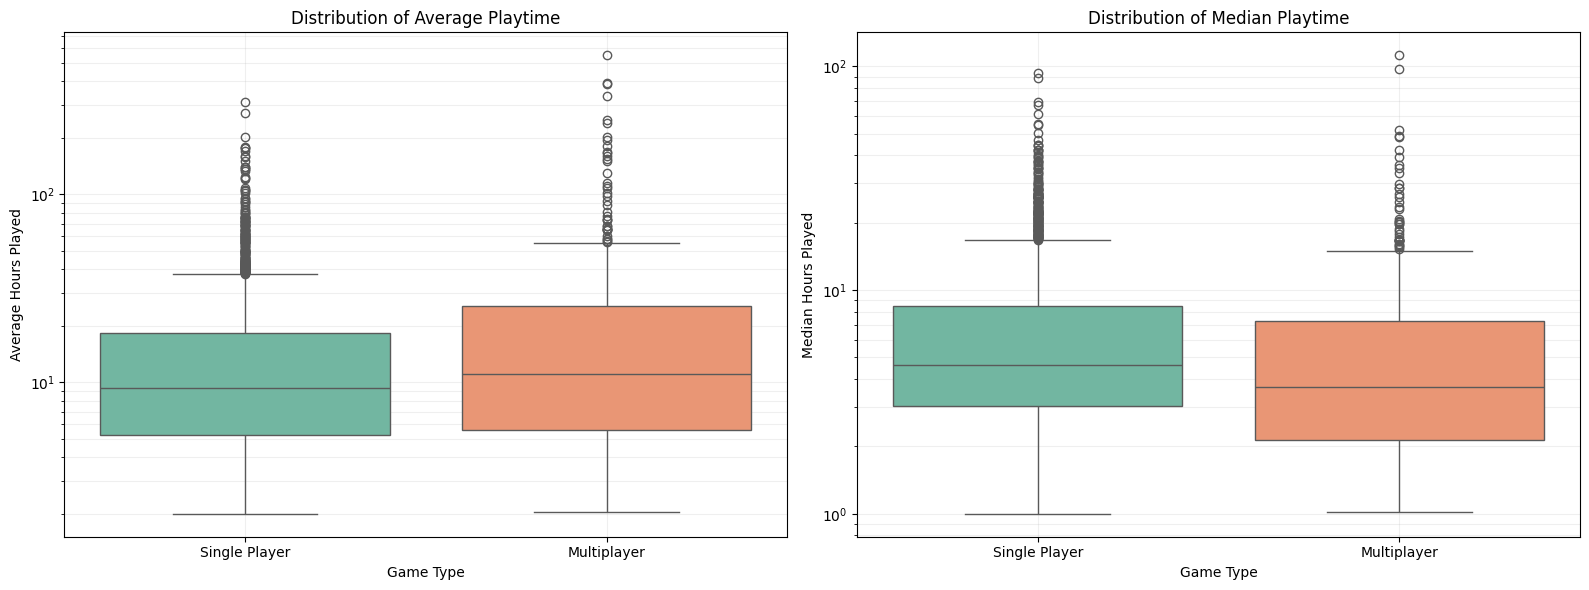

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np

# --- 1. Statistical Testing ---

# We check 'average_forever' first
sp_avg = single_player_df['average_forever']
mp_avg = multiplayer_df['average_forever']

# Mann-Whitney U Test (Non-parametric, good for skewed data)
# Alternative='less' implies we are testing if SP is LESS than MP (i.e., MP is greater)
stat, p_value = stats.mannwhitneyu(sp_avg, mp_avg, alternative='less')

print(f"--- Statistical Test Results (Average Playtime) ---")
print(f"Single Player Mean: {sp_avg.mean():.2f} hours")
print(f"Multiplayer Mean:   {mp_avg.mean():.2f} hours")
print(f"Mann-Whitney U statistic: {stat}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Result: Significant! Multiplayer games have statistically higher engagement.")
else:
    print("Result: Not significant. No statistical difference found.")

# --- 2. Visualization ---

# Combine data for plotting
# We add a 'Type' column to distinguish them in the plot
single_player_df['Game Type'] = 'Single Player'
multiplayer_df['Game Type'] = 'Multiplayer'

combined_plot_df = pd.concat([single_player_df, multiplayer_df])

# Create the plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot A: Box Plot of Average Playtime
sns.boxplot(x='Game Type', y='average_forever', data=combined_plot_df, ax=ax[0], palette="Set2")
ax[0].set_title('Distribution of Average Playtime')
ax[0].set_ylabel('Average Hours Played')
ax[0].set_yscale('log') # Log scale is CRITICAL here to see the data clearly
ax[0].grid(True, which="both", ls="-", alpha=0.2)

# Plot B: Box Plot of Median Playtime (Often a more "honest" metric)
sns.boxplot(x='Game Type', y='median_forever', data=combined_plot_df, ax=ax[1], palette="Set2")
ax[1].set_title('Distribution of Median Playtime')
ax[1].set_ylabel('Median Hours Played')
ax[1].set_yscale('log')
ax[1].grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

<span style="color: pink; font-weight: bold;">
Qustion 2:Social Accountability: Do games with co-op mechanics result in higher campaign completion rates than pure single-player games?
</span>
<br><br>
We can test this by first splitting games into co-op (greater than 0 co-op hours) and non-co-op (0 co-op hours) and testing:

--- T-Test Results ---
Pure Single Player Mean Ratio: 1.08
Co-Op Enabled Mean Ratio:      1.15
T-Statistic: 1.37
P-value: 0.08585
Result: Not significant.


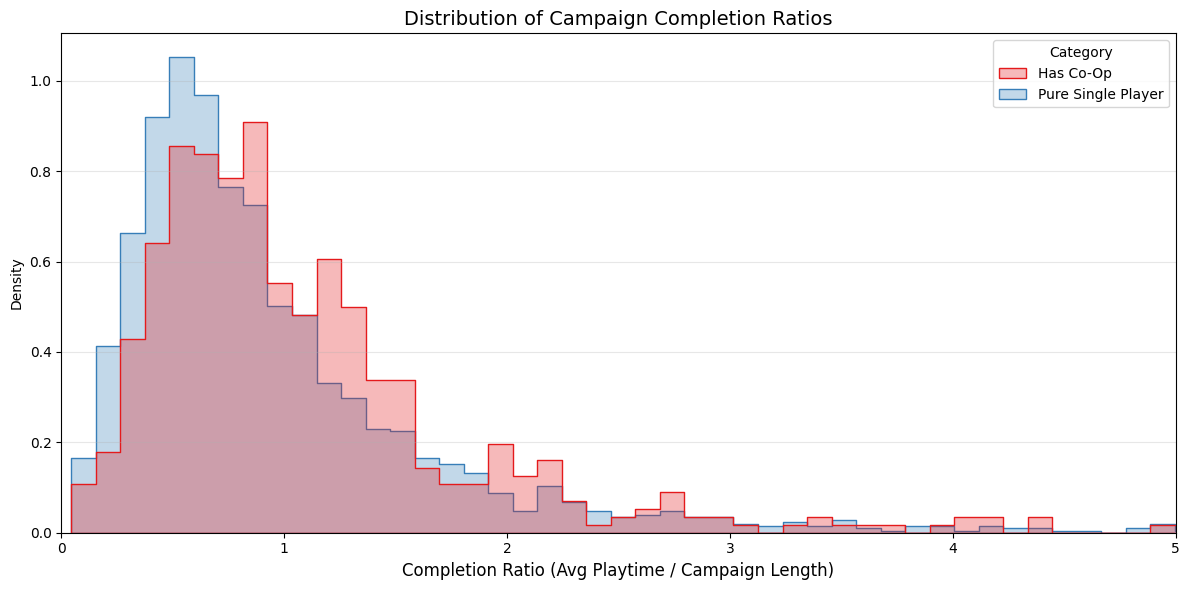

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# --- 1. Data Prep ---
# (Assuming 'single_player_df' is already loaded from your previous steps)

# Filter for games with meaningful campaigns (> 4 hours)
df_analysis = single_player_df[single_player_df['Main Story (h)'] > 4].copy()

# Calculate the Ratio
df_analysis['completion_ratio'] = df_analysis['average_forever'] / df_analysis['Main Story (h)']

# Define Groups
df_analysis['has_coop'] = df_analysis['Co-Op (h)'].fillna(0) > 0
group_pure_sp = df_analysis[df_analysis['has_coop'] == False]['completion_ratio']
group_coop = df_analysis[df_analysis['has_coop'] == True]['completion_ratio']

# Create a Label column for the plot
df_analysis['Category'] = df_analysis['has_coop'].map({True: 'Has Co-Op', False: 'Pure Single Player'})

# --- 2. The Calculation (T-Test) ---
# We use "Welch's T-Test" (equal_var=False) because one group might be more variable than the other.
# 'alternative=greater' checks if Co-Op is GREATER than Pure SP.
t_stat, p_value = stats.ttest_ind(group_coop, group_pure_sp, equal_var=False, alternative='greater')

print(f"--- T-Test Results ---")
print(f"Pure Single Player Mean Ratio: {group_pure_sp.mean():.2f}")
print(f"Co-Op Enabled Mean Ratio:      {group_coop.mean():.2f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Result: Significant! Co-Op games have a higher mean completion ratio.")
else:
    print("Result: Not significant.")

# --- 3. The Visualization (Histogram) ---
plt.figure(figsize=(12, 6))

# We use stat='density' to normalize the bars. 
# Without this, the 'Pure SP' bars would be huge and 'Co-Op' tiny just because there are more SP games.
sns.histplot(
    data=df_analysis, 
    x='completion_ratio', 
    hue='Category', 
    element='step',     # 'step' makes it look like an outline/transparent overlap
    stat='density',     # CRITICAL: Normalizes so we compare shapes, not counts
    common_norm=False,  # Calculate density for each group separately
    palette='Set1',
    alpha=0.3
)

plt.title('Distribution of Campaign Completion Ratios', fontsize=14)
plt.xlabel('Completion Ratio (Avg Playtime / Campaign Length)', fontsize=12)
plt.xlim(0, 5) # Limit view to 0-5x ratio to hide extreme outliers
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

But this is not enough! We want to also test if increasing the number of hours in the co-op column; i.e, do games with a larger co-op component have greater levels of player engagment?

--- Correlation Analysis: Length of Co-Op vs. Engagement ---
Spearman Correlation Coefficient: 0.028
P-value: 0.52692
Result: No significant correlation found.


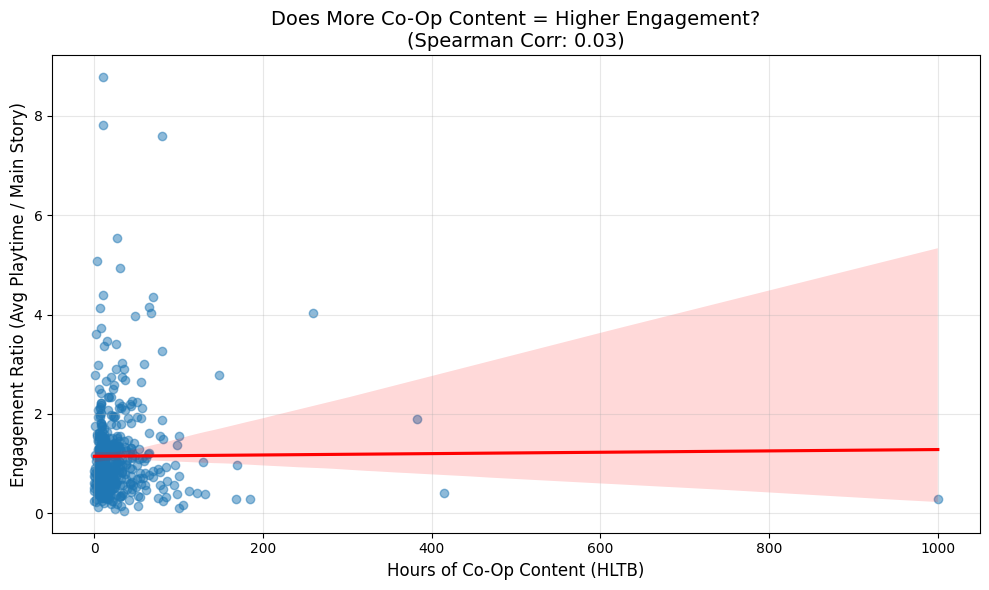

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# --- 1. Filter for Co-Op Games ---
# We only want to analyze games that actually HAVE a co-op mode.
# We use the 'single_player_df' because we are looking at "Single Player games with Co-Op elements"
# (Make sure you have run the cell where you defined 'average_campaign_beaten' first!)

coop_analysis_df = single_player_df[
    (single_player_df['Co-Op (h)'] > 0) & 
    (single_player_df['average_campaign_beaten'] < 10) # Filter extreme outliers (>10x playtime) for cleaner plots
].copy()

# --- 2. The Statistical Test (Spearman Correlation) ---
# We use Spearman because playtimes are rarely linear/normal
corr_coef, p_value = stats.spearmanr(coop_analysis_df['Co-Op (h)'], coop_analysis_df['average_campaign_beaten'])

print(f"--- Correlation Analysis: Length of Co-Op vs. Engagement ---")
print(f"Spearman Correlation Coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    if corr_coef > 0:
        print("Result: Significant POSITIVE correlation. More Co-Op content links to higher engagement ratios.")
    else:
        print("Result: Significant NEGATIVE correlation.")
else:
    print("Result: No significant correlation found.")

# --- 3. Visualization (Regression Plot) ---
plt.figure(figsize=(10, 6))

# Regplot draws the scatter points AND a trend line (regression line)
sns.regplot(
    x='Co-Op (h)', 
    y='average_campaign_beaten', 
    data=coop_analysis_df, 
    scatter_kws={'alpha':0.5}, # Make dots transparent to see density
    line_kws={'color':'red'}   # Trend line color
)

plt.title(f'Does More Co-Op Content = Higher Engagement?\n(Spearman Corr: {corr_coef:.2f})', fontsize=14)
plt.xlabel('Hours of Co-Op Content (HLTB)', fontsize=12)
plt.ylabel('Engagement Ratio (Avg Playtime / Main Story)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Therfore, we can funnily conclude that while having co-op features in a game does indeed increase player engagment, the *amount* of co-op features or their length may not have a special effect. Meaning players value the features themselves, rather than how 'meaty' they are.

<span style="color: pink; font-weight: bold;">
The Distraction Effect: Does a high ratio of side content to main story length negatively correlate with main story completion rates?
</span>

--- 🎮 THE BLOAT REPORT 🎮 ---
Total Games Analyzed: 2176
The 'Bloat Line' (Median): 0.43 (Games above this are 'Stuffed')

--- The Scoreboard ---
Focused Games Completion: 0.78x of campaign length
Stuffed Games Completion: 1.20x of campaign length

--- The Verdict ---
T-Statistic: 13.68
P-Value: 1.58e-40
Cohen's d (Effect Size): 0.59
Analysis: MEDIUM to LARGE effect! (Players definitely notice)
Conclusion: MYTH BUSTED! 🚨 Bloated games actually keep players longer!


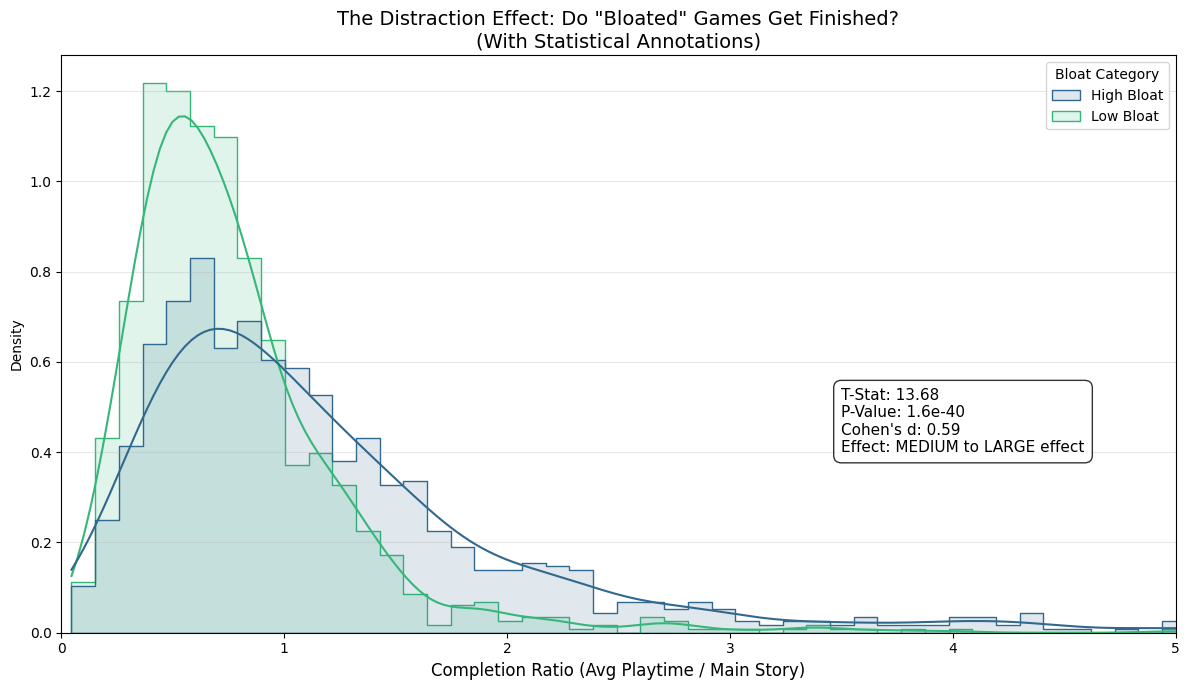

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np

# --- 1. Data Prep (Assumes single_player_df is loaded) ---
# Filter for meaningful campaigns
df_distraction = single_player_df[single_player_df['Main Story (h)'] > 4].copy()

# Calculate Variables
df_distraction['bloat_ratio'] = (df_distraction['Main + Sides (h)'] - df_distraction['Main Story (h)']) / df_distraction['Main Story (h)']
df_distraction['completion_ratio'] = df_distraction['average_forever'] / df_distraction['Main Story (h)']

# Clean up
df_distraction = df_distraction[
    (df_distraction['bloat_ratio'] >= 0) & 
    (df_distraction['completion_ratio'] < 6)
]

# Categorize
median_bloat = df_distraction['bloat_ratio'].median()
df_distraction['Bloat Category'] = np.where(
    df_distraction['bloat_ratio'] > median_bloat, 'High Bloat', 'Low Bloat'
)

group_high = df_distraction[df_distraction['Bloat Category'] == 'High Bloat']['completion_ratio']
group_low = df_distraction[df_distraction['Bloat Category'] == 'Low Bloat']['completion_ratio']

# --- 2. Advanced Statistics ---
# A. T-Test
t_stat, p_val = stats.ttest_ind(group_high, group_low, equal_var=False)

# B. Cohen's d (Effect Size)
# Formula: (Mean1 - Mean2) / Pooled Standard Deviation
n1, n2 = len(group_high), len(group_low)
var1, var2 = np.var(group_high, ddof=1), np.var(group_low, ddof=1)
pooled_se = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
cohens_d = (group_high.mean() - group_low.mean()) / pooled_se

# C. Confidence Interval (95%)
ci_low = group_low.mean() - 1.96 * (group_low.std() / np.sqrt(n2))
ci_high = group_low.mean() + 1.96 * (group_low.std() / np.sqrt(n2))

# --- 3. The "Fun" Report ---
print(f"--- 🎮 THE BLOAT REPORT 🎮 ---")
print(f"Total Games Analyzed: {len(df_distraction)}")
print(f"The 'Bloat Line' (Median): {median_bloat:.2f} (Games above this are 'Stuffed')")
print(f"\n--- The Scoreboard ---")
print(f"Focused Games Completion: {group_low.mean():.2f}x of campaign length")
print(f"Stuffed Games Completion: {group_high.mean():.2f}x of campaign length")
print(f"\n--- The Verdict ---")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val:.2e}")
print(f"Cohen's d (Effect Size): {cohens_d:.2f}")

if cohens_d > 0.5:
    effect_text = "MEDIUM to LARGE effect! (Players definitely notice)"
elif cohens_d > 0.2:
    effect_text = "SMALL effect. (Noticeable but not huge)"
else:
    effect_text = "NEGLIGIBLE effect."

print(f"Analysis: {effect_text}")
if p_val < 0.05:
    print("Conclusion: MYTH BUSTED! 🚨 Bloated games actually keep players longer!")
else:
    print("Conclusion: PLAUSIBLE. Bloat might actually be boring.")

# --- 4. Annotated Visualization ---
plt.figure(figsize=(12, 7))

sns.histplot(
    data=df_distraction, 
    x='completion_ratio', 
    hue='Bloat Category', 
    element='step',     
    stat='density',     
    common_norm=False, 
    kde=True,
    palette='viridis',
    alpha=0.15
)

# Add Text Annotation directly on plot
stats_text = (
    f"T-Stat: {t_stat:.2f}\n"
    f"P-Value: {p_val:.1e}\n"
    f"Cohen's d: {cohens_d:.2f}\n"
    f"Effect: {effect_text.split('!')[0]}"
)
plt.text(
    x=3.5, y=0.4, 
    s=stats_text, 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'),
    fontsize=11
)

plt.title('The Distraction Effect: Do "Bloated" Games Get Finished?\n(With Statistical Annotations)', fontsize=14)
plt.xlabel('Completion Ratio (Avg Playtime / Main Story)', fontsize=12)
plt.xlim(0, 5)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<span style="color: pink; font-weight: bold;">
Question 4: The Whale Indicator: Do multiplayer games exhibit a significantly larger skew between average and median playtime than single-player games?
</span>

--- 🐋 THE WHALE INDICATOR 🐋 ---
Single Player Median Skew: 0.81
Multiplayer Median Skew:   1.78
P-Value: 3.24e-37


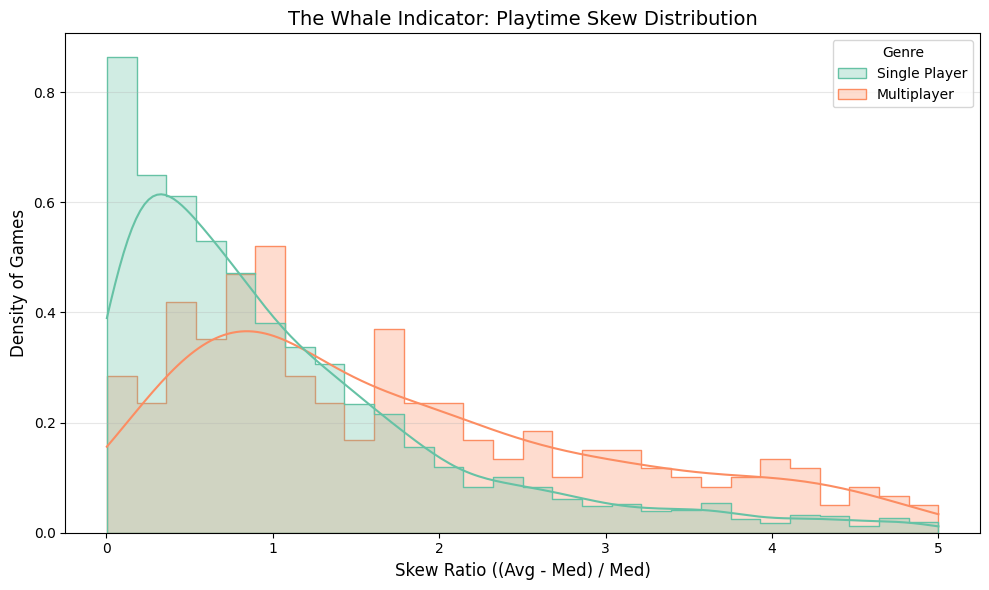

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np

# --- 1. Data Prep ---
# (Assumes single_player_df and multiplayer_df are loaded)

# Calculate Skew Ratio: (Average - Median) / Median
single_player_df['whale_skew'] = (single_player_df['average_forever'] - single_player_df['median_forever']) / single_player_df['median_forever']
multiplayer_df['whale_skew'] = (multiplayer_df['average_forever'] - multiplayer_df['median_forever']) / multiplayer_df['median_forever']

# --- 2. Statistical Test ---
sp_skew = single_player_df['whale_skew']
mp_skew = multiplayer_df['whale_skew']

stat, p_val = stats.mannwhitneyu(mp_skew, sp_skew, alternative='greater')

print(f"--- 🐋 THE WHALE INDICATOR 🐋 ---")
print(f"Single Player Median Skew: {sp_skew.median():.2f}")
print(f"Multiplayer Median Skew:   {mp_skew.median():.2f}")
print(f"P-Value: {p_val:.2e}")

# --- 3. Visualization (Histogram) ---
# Combine for plotting
plot_df = pd.concat([
    pd.DataFrame({'Skew Ratio': sp_skew, 'Genre': 'Single Player'}),
    pd.DataFrame({'Skew Ratio': mp_skew, 'Genre': 'Multiplayer'})
])

# For the histogram, we focus on the "normal" range (0 to 5) so the plot isn't squashed.
# (There are outliers with skew > 20, but they make the graph unreadable)
plot_df_clean = plot_df[plot_df['Skew Ratio'] < 5]

plt.figure(figsize=(10, 6))

sns.histplot(
    data=plot_df_clean, 
    x='Skew Ratio', 
    hue='Genre', 
    element='step',     # Outline style (cleaner overlap)
    stat='density',     # Normalize bars to compare shapes
    common_norm=False, 
    kde=True,           # Add the smooth line
    palette='Set2',
    alpha=0.3
)

plt.title('The Whale Indicator: Playtime Skew Distribution', fontsize=14)
plt.xlabel('Skew Ratio ((Avg - Med) / Med)', fontsize=12)
plt.ylabel('Density of Games', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()